In [124]:
%reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from tqdm.notebook import tqdm
import librosa
import sounddevice as sd
from scipy import signal
import librosa.display

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
HOUSE_FOLDER = "/home/george/code/clumzy/electronic_tagger/DATA/HOUSE"
TECHNO_FOLDER = "/home/george/code/clumzy/electronic_tagger/DATA/TECHNO"

exts = ['*.mp3', '*.wav', '*.flac', '*.aiff']

house_files = [f for ext in exts for f in glob(os.path.join(HOUSE_FOLDER, ext))]
techno_files = [f for ext in exts for f in glob(os.path.join(TECHNO_FOLDER, ext))]

In [229]:
SONG_NUM = 104
HOP_LENGTH = 2048

house_waveforms = [librosa.load(house_file, sr=44100, dtype=np.float16) for house_file in tqdm(house_files[SONG_NUM:SONG_NUM+1])]
#techno_waveforms = [librosa.load(techno_file, sr=None) for techno_file in tqdm(techno_files[SONG_NUM:SONG_NUM+1])]

song = house_waveforms[0][0]
sr = house_waveforms[0][1]
song_inter = np.linspace(0,(song.shape[0]-sr*6),6).astype(int)
sample_length = sr*5
song_extracts = np.hstack([song[song_inter[i]:song_inter[i]+sample_length] for i in range(0,6)])

  0%|          | 0/1 [00:00<?, ?it/s]

In [230]:
house_files[SONG_NUM]

'/home/george/code/clumzy/electronic_tagger/DATA/HOUSE/Honey Dijon - La Femme Fantastique (KiNK & KEi Extended Remix) [Classic Music Company].mp3'

In [231]:
stft = librosa.stft(song_extracts, hop_length=HOP_LENGTH)
harmonic, percussive = librosa.decompose.hpss(stft)
rp = np.max(np.abs(stft))
p = librosa.amplitude_to_db(percussive, ref=rp)

In [232]:
mfcc_song = librosa.feature.mfcc(song_extracts, n_mfcc=13, sr=sr, lifter=256, hop_length=HOP_LENGTH)

In [233]:
chroma = librosa.feature.chroma_stft(song_extracts, sr=sr, hop_length=HOP_LENGTH, center = False)

In [250]:
from skimage.transform import resize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,255))


r = scaler.fit_transform(resize(p, (646,646), anti_aliasing=None, mode="reflect", order=0)).astype(np.uint)
g = scaler.fit_transform(resize(mfcc_song, (646,646), anti_aliasing=None, mode="reflect", order=0)).astype(np.uint)
b = scaler.fit_transform(resize(chroma, (646,646), anti_aliasing=None, mode="reflect", order=0)).astype(np.uint)

-1271.0778

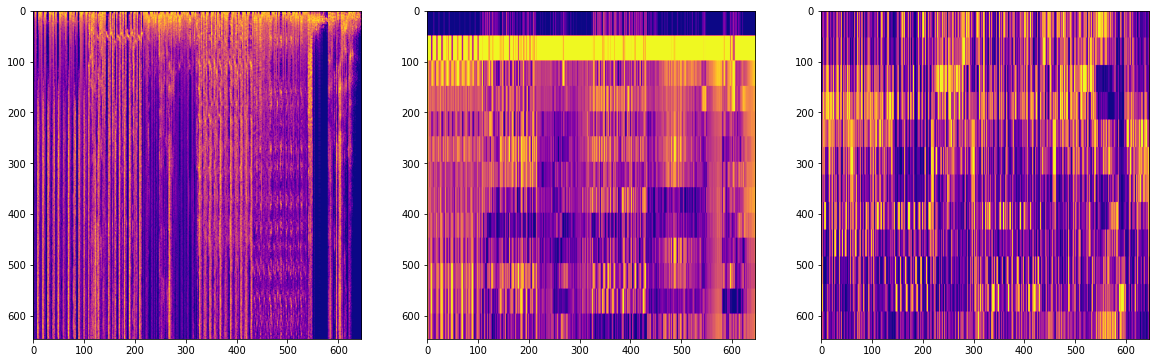

In [251]:
from skimage.transform import resize

plt.figure(figsize=(20,60))
plt.subplot(1,3,1)
plt.imshow((r), cmap="plasma")
plt.subplot(1,3,2)
plt.imshow(g, cmap="plasma")
plt.subplot(1,3,3)
plt.imshow(b, cmap="plasma")
plt.show()

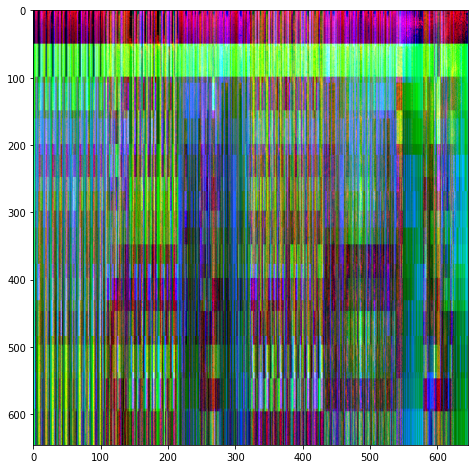

In [252]:
from PIL import Image

rgb = np.dstack((r,g,b))
plt.figure(figsize=(8,8))
plt.imshow(rgb)